## Overview

In this section we will be building an face detection algorithm but this time only OpenCV is not involved instead along with the computer vision techniques, the deep learning skills will also be required i.e We are gonna use the deep learning pre-trained model to detect the faces from the image of different angles and the model that we will use is **caffe model**.

## Perks of using the deep learning model

1. **Efficient processing:** As we all know that deep learning models are best whenever we mention about the image processing so for that reason we are using the caffe model which is pre-trained model.


2. **Accurate results**: Whenever we use the deep learning model in image processing application so there we are using the neural networks which will definitely gives better results when compared to HAAR cascade classifier.


3. **Detecting multiple faces**: In other methods sometimes we are not able to detect the multiple faces but while using the **ResNet-10 Architecture** we can efficiently detect the multiple faces through network model (**SSD**)

### **Import the Libraries**

We will first import the required libraries.

In [2]:
import os
import cv2
# import dlib
from time import time
import matplotlib.pyplot as plt

## Deep learning based face detection

We have come across many algorithms which used to detect the faces both in real-time as well as in images here we are using the deep learning approach that uses a **ResNet-10 neural network architecture** to detect the multiple face in the image which is more accurate than the **OpenCV HAAR cascade** face detection method 

## Loading the Deep Learning based Face Detector

For loading the deep learning based face detector we have two opetions in hand,
1. **Caffe**: The Caffe framework which used to take around 5.1 Mb as memory.
2. **Tensorflow**: The tensorflow framework will be taking around 2.7 MB memory.

For loading the **Caffe model** we will use the **cv2.dnn.readNetFromCaffe()** and if we want to load the Tensorflow model then, **cv2.dnn.readNetFromTensorflow()** function will be used just make sure to use the appropriate arguments.

Here in this tutorial we will be going with **Caffe Model**. Just a simple note before using this model as mentioned earlier that caffe's framework use the neural architecture so that layers will be stored in the disk.

In [3]:
opencv_dnn_model = cv2.dnn.readNetFromCaffe(prototxt="models/deploy.prototxt",
                                            caffeModel="models/res10_300x300_ssd_iter_140000_fp16.caffemodel")

opencv_dnn_model

<dnn_Net 0000029C5E531610>

## Creating the Face detection function

So it's time to create a face detection function which will be named as **cvDnnDetectFaces()**

**Approach:**
* The very first step will be to retrieve the frame/image by using the **cv2.dnn.blobFromImage()** function
* Then we will use the **opencv_dnn_model.setInput()** function for the image pre-processing part that will make it ready to work as the input for the neural network.
* Then comes the **opencv_dnn_model.forward()** function that will give us the array that will hold the coordinates of the normalized bounding boxes and also the confidence value of detection.

**Note:** The more will be the confidence value of detection the more accurate will be the results.

In [4]:
def cvDnnDetectFaces(image, opencv_dnn_model, min_confidence=0.5, display = True):
    
    image_height, image_width, _ = image.shape

    output_image = image.copy()

    preprocessed_image = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(300, 300),
                                               mean=(104.0, 117.0, 123.0), swapRB=False, crop=False)

    opencv_dnn_model.setInput(preprocessed_image)

    start = time()

    results = opencv_dnn_model.forward()    

    end = time()
        
        
    for face in results[0][0]:
        
        face_confidence = face[2]
        
        if face_confidence > min_confidence:

            bbox = face[3:]

            x1 = int(bbox[0] * image_width)
            y1 = int(bbox[1] * image_height)
            x2 = int(bbox[2] * image_width)
            y2 = int(bbox[3] * image_height)

            
            cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=image_width//200)

            cv2.rectangle(output_image, pt1=(x1, y1-image_width//20), pt2=(x1+image_width//16, y1),
                          color=(0, 255, 0), thickness=-1)

            cv2.putText(output_image, text=str(round(face_confidence, 1)), org=(x1, y1-25), 
                        fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=image_width//700,
                        color=(255,255,255), thickness=image_width//200)

    if display:
        
        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=image_width//700,
                    color=(0,0,255), thickness=image_width//500)
        
        plt.figure(figsize=[20,20])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        
    else:
        
        return output_image, results              

Code breakdown:

1. Here the very first step is to get the height and width of the image using the **shape** function.

2. Now we will **create a copy** of the original image and on this image only we will draw the **bounding boxes** and write the **confidence scores** as well.

3. Now we will create a **blob from the image** i.e. to make it ready in the format of input for the neural network and to perform the pre-processing on the image.

4. Then just after that we will **resize** the image so that we can apply the **mean subtraction** on the channels of the image and convert the image from **BGR to RGB** format

5. Now with the help of **setInput** function we will set up the input value for the architecture and also get the **current time** from the system just before starting the face detection.

6. Finally we will initiate the face detection using the **forward()** function and after that note the **current time** after the face has been detected. 

7. As we are trying to detect the multiple faces then here we will loop through each face that has been detected by our model

8. Before drawing the bounding boxes and write the confidence scores we have to perform follwing steps:
    * The very first thing will be to get the confidence score and then check that whether confidence score is greater than the threshold value or not
    * If yes, Then we will get the coordinates of the face using indexing and then scale them just according to original image.
    * Now, based on the coordinates that we have we will draw the bounding box on the copy image based on those coordinates also note that we are drawing the filled rectangle so that confidence score is clearly visible to us.
    * At the last we will write the confidence score as well on the image.
    
9. So, by far we have done all the image pre-processing step so now it's time to display the image and to do that we have to first make sure that **display** flag is **True**.

10. If it's True then we will simply use the **putText** method print the **time taken** to detect the face on the image and then we will simply display the original and pre-processed image. Else it will simply return the  **output_image** and **results**.

We are done with all the image pre-processing task we have created a function as well now it's time to display the visual results with the help of function that we have created.

## Read an image to detect the face/faces 

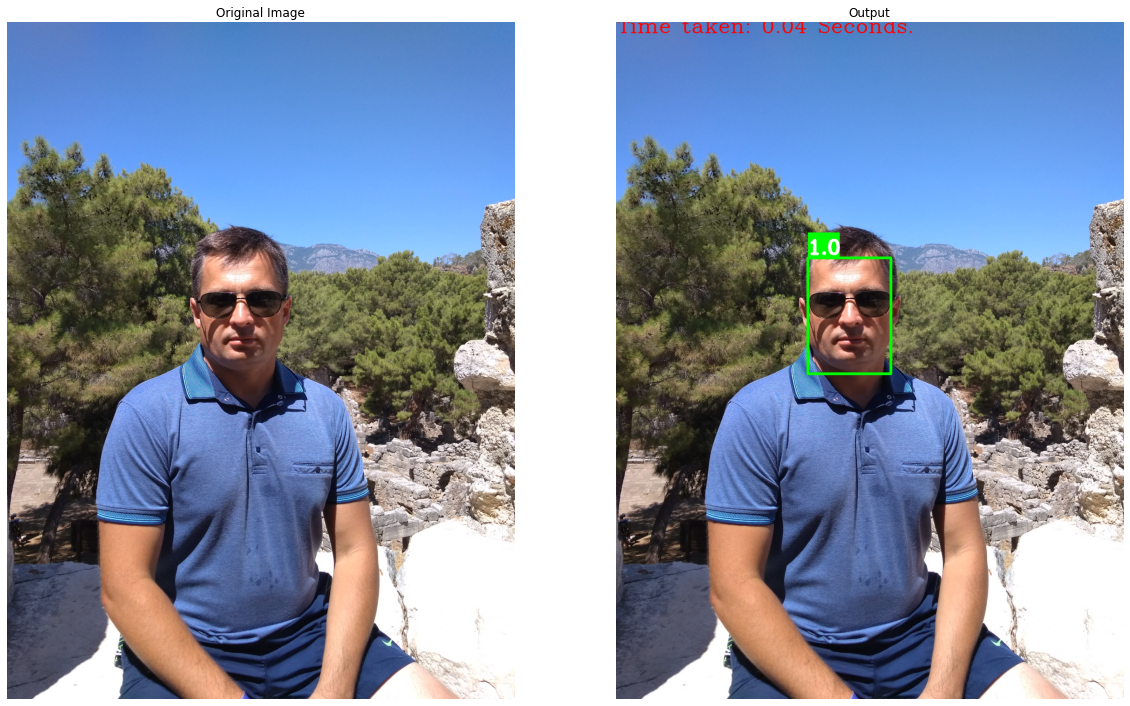

In [21]:
image = cv2.imread('media/3.jpg')

cvDnnDetectFaces(image, opencv_dnn_model, display=True)

So from the above output it is clearly visible that how well our model has performed to even detect the multiple faces in the image with good confidence score as well as it show the time taken for the face to be detected.

## Key takeaways from the article

1. So the very first thing that we got to know about is altogether new algorithm/architecture/model to detect the faces and its background i.e. **Deep learning based face detection (Caffe/tensorflow architecture)**.


2. We have also learned about the main methods which are essential to perform the face detection using those model i.e. **opencv_dnn_model.setInput()** and **opencv_dnn_model.forward()**.


3. Then we learned how to detect the faces/face using **Caffe model** and display the result in the form of bounding boxes and confidence scores.